In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

text_as_list = [
    "who",
    "are",
    "you",
    "that",
    "you",
    "do",
    "not",
    "know",
    "your",
    "history",
]
embedding_size = 300
context = 2

2023-03-01 15:06:14.949259: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-01 15:06:16.488390: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-01 15:06:16.488552: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-01 15:06:16.488568: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

<IPython.core.display.Javascript object>

In [3]:
distinct_words = set(text_as_list)
number_of_words = len(distinct_words)
word2index = dict((w, i) for i, w in enumerate(distinct_words))
index2word = dict((i, w) for i, w in enumerate(distinct_words))

<IPython.core.display.Javascript object>

In [5]:
def create_word_context_and_main_words_lists(text_as_list):
    input_words = []
    label_word = []
    for i in range(0, len(text_as_list)):
        label_word.append((text_as_list[i]))
        context_list = []
        if i >= context and i < (len(text_as_list) - context):
            context_list.append(text_as_list[i - context : i])
            context_list.append(text_as_list[i + 1 : i + 1 + context])
            context_list = [x for subl in context_list for x in subl]
        elif i < context:
            context_list.append(text_as_list[:i])
            context_list.append(text_as_list[i + 1 : i + 1 + context])
            context_list = [x for subl in context_list for x in subl]
        elif i >= (len(text_as_list) - context):
            context_list.append(text_as_list[i - context : i])
            context_list.append(text_as_list[i + 1 :])
            context_list = [x for subl in context_list for x in subl]
        input_words.append((context_list))
    return input_words, label_word


input_words, label_word = create_word_context_and_main_words_lists(text_as_list)
input_vectors = np.zeros((len(text_as_list), number_of_words), dtype=np.int16)
vectorized_labels = np.zeros((len(text_as_list), number_of_words), dtype=np.int16)
for i, input_w in enumerate(input_words):
    for j, w in enumerate(input_w):
        input_vectors[i, word2index[w]] = 1
        vectorized_labels[i, word2index[label_word[i]]] = 1

<IPython.core.display.Javascript object>

In [6]:
word2vec = Sequential()
word2vec.add(
    Dense(
        embedding_size,
        input_shape=(number_of_words,),
        activation="linear",
        use_bias=False,
    )
)
word2vec.add(Dense(number_of_words, activation="softmax", use_bias=False))
word2vec.compile(loss="mean_squared_error", optimizer="sgd", metrics=["accuracy"])
word2vec.fit(input_vectors, vectorized_labels, epochs=1500, batch_size=10, verbose=1)
metrics = word2vec.evaluate(input_vectors, vectorized_labels, verbose=1)
print("%s: %.2f%%" % (word2vec.metrics_names[1], metrics[1] * 100))

2023-03-01 15:19:18.646290: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 15:19:18.742769: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 15:19:18.744114: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-01 15:19:18.746048: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

Epoch 1/1500
1/1 [==============================] - 2s 2s/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 2/1500
1/1 [==============================] - 0s 6ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 3/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 4/1500
1/1 [==============================] - 0s 6ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 5/1500


2023-03-01 15:19:23.156946: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fcdd8069610 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-01 15:19:23.157026: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2023-03-01 15:19:23.174227: W tensorflow/compiler/xla/service/gpu/nvptx_helper.cc:56] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-11.2
  /usr/local/cuda
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda will work.
2023-03-01 15:19:23.292094: I tensorflow/compiler/jit/xla_compilation_cache.c

1/1 [==============================] - 0s 10ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 6/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 7/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 8/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 9/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 10/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 11/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 12/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 13/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.1000 - accuracy: 0.0000e+00
Epoch 14/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.1000 - accur

1/1 [==============================] - 0s 9ms/step - loss: 0.0992 - accuracy: 0.0000e+00
Epoch 163/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0992 - accuracy: 0.0000e+00
Epoch 164/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0992 - accuracy: 0.0000e+00
Epoch 165/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0992 - accuracy: 0.0000e+00
Epoch 166/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0992 - accuracy: 0.0000e+00
Epoch 167/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0992 - accuracy: 0.0000e+00
Epoch 168/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0992 - accuracy: 0.0000e+00
Epoch 169/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0992 - accuracy: 0.0000e+00
Epoch 170/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0992 - accuracy: 0.0000e+00
Epoch 171/1500
1/1 [==============================] - 0s 10ms/step - loss: 0

1/1 [==============================] - 0s 9ms/step - loss: 0.0984 - accuracy: 0.0000e+00
Epoch 319/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0984 - accuracy: 0.0000e+00
Epoch 320/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0984 - accuracy: 0.0000e+00
Epoch 321/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0984 - accuracy: 0.0000e+00
Epoch 322/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0984 - accuracy: 0.0000e+00
Epoch 323/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0984 - accuracy: 0.0000e+00
Epoch 324/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0984 - accuracy: 0.0000e+00
Epoch 325/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0984 - accuracy: 0.0000e+00
Epoch 326/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0984 - accuracy: 0.0000e+00
Epoch 327/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0

1/1 [==============================] - 0s 9ms/step - loss: 0.0976 - accuracy: 0.1000
Epoch 481/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0976 - accuracy: 0.1000
Epoch 482/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0976 - accuracy: 0.1000
Epoch 483/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0976 - accuracy: 0.1000
Epoch 484/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0975 - accuracy: 0.1000
Epoch 485/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0975 - accuracy: 0.1000
Epoch 486/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0975 - accuracy: 0.1000
Epoch 487/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0975 - accuracy: 0.1000
Epoch 488/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0975 - accuracy: 0.1000
Epoch 489/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0975 - accuracy: 0.1000
Epoch 490/1

Epoch 562/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0971 - accuracy: 0.1000
Epoch 563/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0971 - accuracy: 0.1000
Epoch 564/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0971 - accuracy: 0.1000
Epoch 565/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0971 - accuracy: 0.1000
Epoch 566/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0971 - accuracy: 0.1000
Epoch 567/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0971 - accuracy: 0.1000
Epoch 568/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.0971 - accuracy: 0.1000
Epoch 569/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0971 - accuracy: 0.1000
Epoch 570/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0971 - accuracy: 0.1000
Epoch 571/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0971 - accuracy: 0.1000

1/1 [==============================] - 0s 9ms/step - loss: 0.0962 - accuracy: 0.3000
Epoch 725/1500
1/1 [==============================] - 0s 12ms/step - loss: 0.0962 - accuracy: 0.3000
Epoch 726/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0962 - accuracy: 0.3000
Epoch 727/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0962 - accuracy: 0.3000
Epoch 728/1500
1/1 [==============================] - 0s 13ms/step - loss: 0.0962 - accuracy: 0.3000
Epoch 729/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0962 - accuracy: 0.3000
Epoch 730/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0962 - accuracy: 0.3000
Epoch 731/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0962 - accuracy: 0.3000
Epoch 732/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0962 - accuracy: 0.3000
Epoch 733/1500
1/1 [==============================] - 0s 11ms/step - loss: 0.0962 - accuracy: 0.3000
Epoch 734

1/1 [==============================] - 0s 10ms/step - loss: 0.0953 - accuracy: 0.5000
Epoch 887/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.0953 - accuracy: 0.5000
Epoch 888/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0953 - accuracy: 0.5000
Epoch 889/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.0953 - accuracy: 0.5000
Epoch 890/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0953 - accuracy: 0.5000
Epoch 891/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0952 - accuracy: 0.5000
Epoch 892/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0952 - accuracy: 0.5000
Epoch 893/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0952 - accuracy: 0.5000
Epoch 894/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0952 - accuracy: 0.5000
Epoch 895/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0952 - accuracy: 0.5000
Epoch 896/

Epoch 968/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0948 - accuracy: 0.5000
Epoch 969/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0948 - accuracy: 0.5000
Epoch 970/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0948 - accuracy: 0.5000
Epoch 971/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0948 - accuracy: 0.5000
Epoch 972/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.0948 - accuracy: 0.5000
Epoch 973/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0948 - accuracy: 0.5000
Epoch 974/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0948 - accuracy: 0.5000
Epoch 975/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0947 - accuracy: 0.5000
Epoch 976/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0947 - accuracy: 0.5000
Epoch 977/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0947 - accuracy: 0.5000


1/1 [==============================] - 0s 8ms/step - loss: 0.0938 - accuracy: 0.7000
Epoch 1131/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0938 - accuracy: 0.7000
Epoch 1132/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0938 - accuracy: 0.7000
Epoch 1133/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0938 - accuracy: 0.7000
Epoch 1134/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0938 - accuracy: 0.7000
Epoch 1135/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0938 - accuracy: 0.7000
Epoch 1136/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0938 - accuracy: 0.7000
Epoch 1137/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0938 - accuracy: 0.7000
Epoch 1138/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0938 - accuracy: 0.7000
Epoch 1139/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0937 - accuracy: 0.7000
Epoc

1/1 [==============================] - 0s 9ms/step - loss: 0.0928 - accuracy: 0.7000
Epoch 1293/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.0928 - accuracy: 0.7000
Epoch 1294/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.0928 - accuracy: 0.7000
Epoch 1295/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0928 - accuracy: 0.7000
Epoch 1296/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.0928 - accuracy: 0.7000
Epoch 1297/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0928 - accuracy: 0.7000
Epoch 1298/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0927 - accuracy: 0.7000
Epoch 1299/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0927 - accuracy: 0.7000
Epoch 1300/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0927 - accuracy: 0.7000
Epoch 1301/1500
1/1 [==============================] - 0s 10ms/step - loss: 0.0927 - accuracy: 0.7000
Epoc

1/1 [==============================] - 0s 8ms/step - loss: 0.0917 - accuracy: 0.7000
Epoch 1455/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0917 - accuracy: 0.7000
Epoch 1456/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.0917 - accuracy: 0.7000
Epoch 1457/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0917 - accuracy: 0.7000
Epoch 1458/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0917 - accuracy: 0.7000
Epoch 1459/1500
1/1 [==============================] - 0s 7ms/step - loss: 0.0917 - accuracy: 0.7000
Epoch 1460/1500
1/1 [==============================] - 0s 8ms/step - loss: 0.0917 - accuracy: 0.7000
Epoch 1461/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0917 - accuracy: 0.7000
Epoch 1462/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0917 - accuracy: 0.7000
Epoch 1463/1500
1/1 [==============================] - 0s 9ms/step - loss: 0.0917 - accuracy: 0.7000
Epoch 

<IPython.core.display.Javascript object>

In [7]:
word2vec.save_weights("all_weights.h5")
embedding_weight_matrix = word2vec.get_weights()[0]

<IPython.core.display.Javascript object>

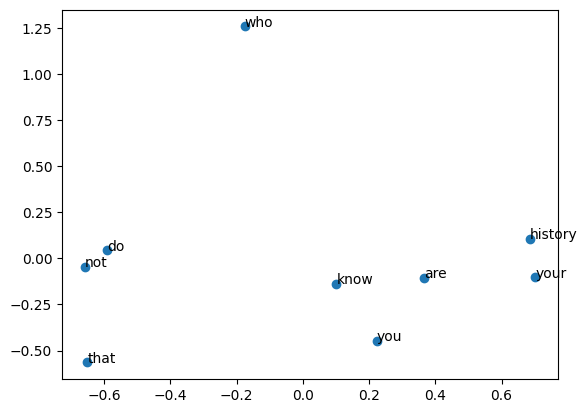

<IPython.core.display.Javascript object>

In [8]:
pca = PCA(n_components=2)
pca.fit(embedding_weight_matrix)
results = pca.transform(embedding_weight_matrix)
x = np.transpose(results).tolist()[0]
y = np.transpose(results).tolist()[1]
n = list(word2index.keys())
fig, ax = plt.subplots()
ax.scatter(x, y)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
plt.savefig("word_vectors_in_2D_space.png")
plt.show()